C:\Users\NURAFIQAHALIAHBINTIQ\AppData\Local\Temp\ipykernel_15024\3303556007.py:24: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates_lr = pd.date_range(data.index[-1] + pd.offsets.MonthEnd(1), periods=6, freq='M')
C:\Users\NURAFIQAHALIAHBINTIQ\anaconda3\envs\ForecastPython\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\NURAFIQAHALIAHBINTIQ\anaconda3\envs\ForecastPython\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\NURAFIQAHALIAHBINTIQ\anaconda3\envs\ForecastPython\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)

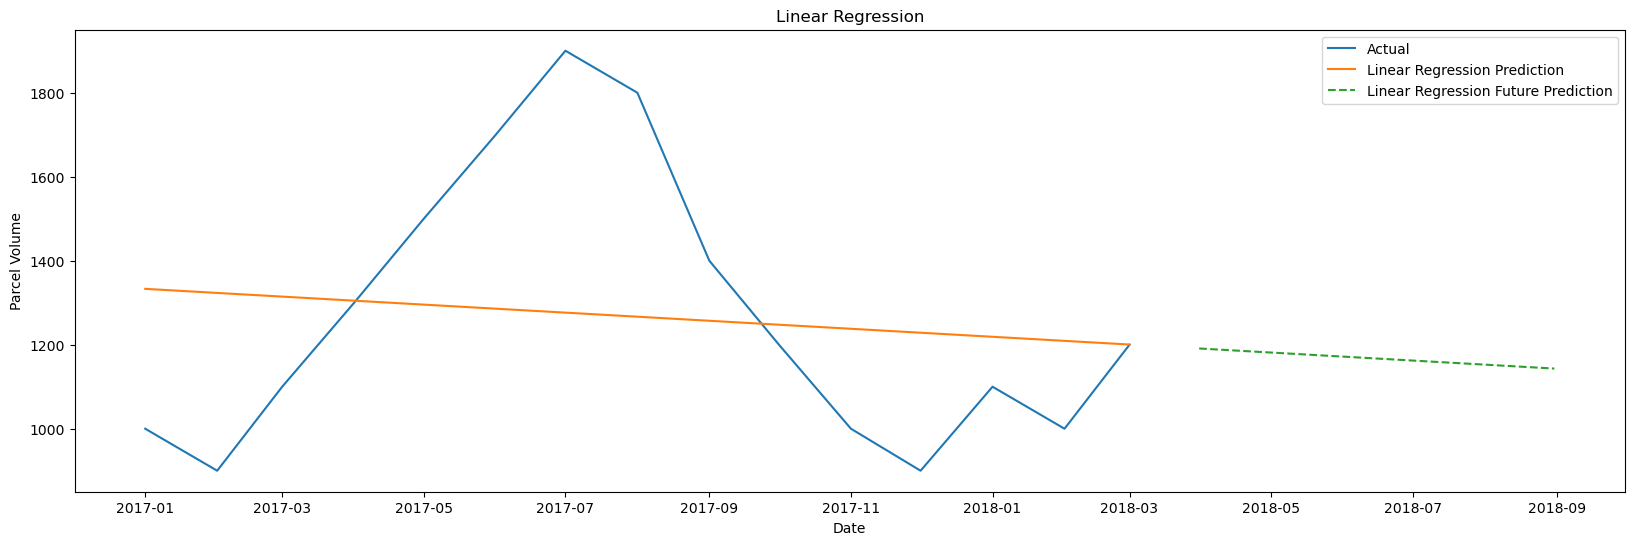

C:\Users\NURAFIQAHALIAHBINTIQ\AppData\Local\Temp\ipykernel_15024\3303556007.py:74: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  plt.plot(pd.date_range(data.index[-1] + pd.Timedelta(days=1), periods=6, freq='M'), predictions_arima_future, label='ARIMA Future Prediction', linestyle='--')


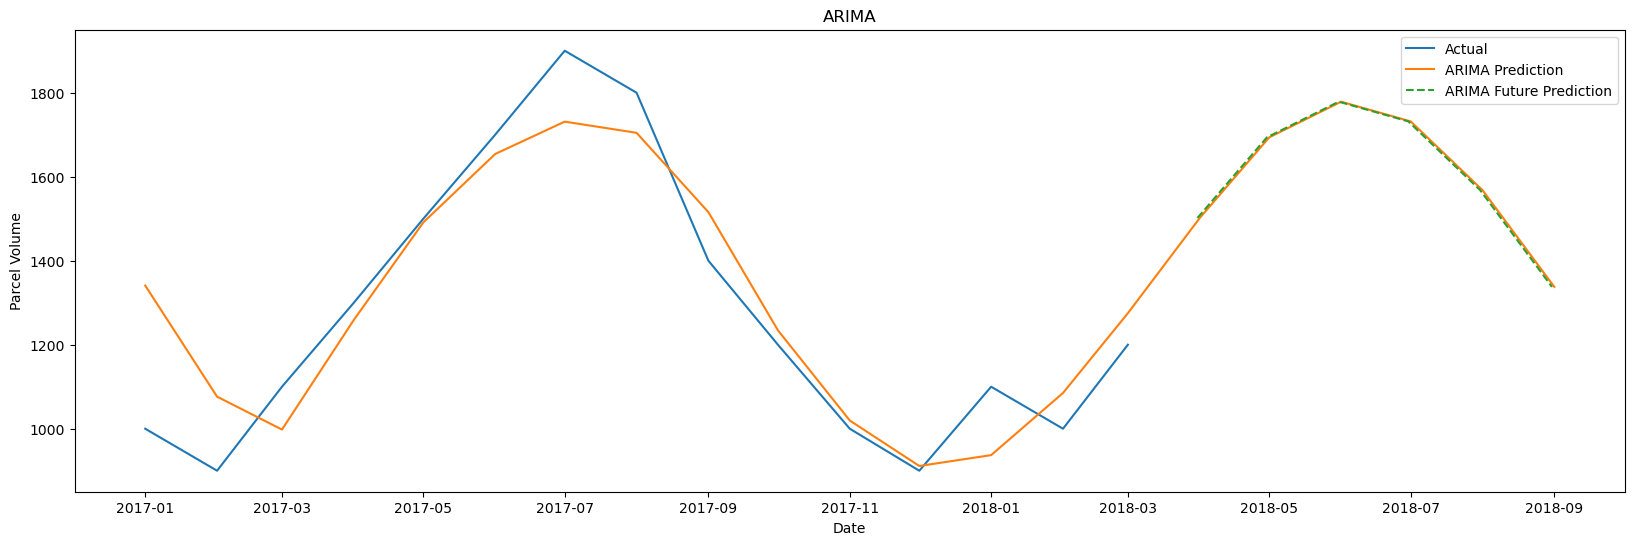

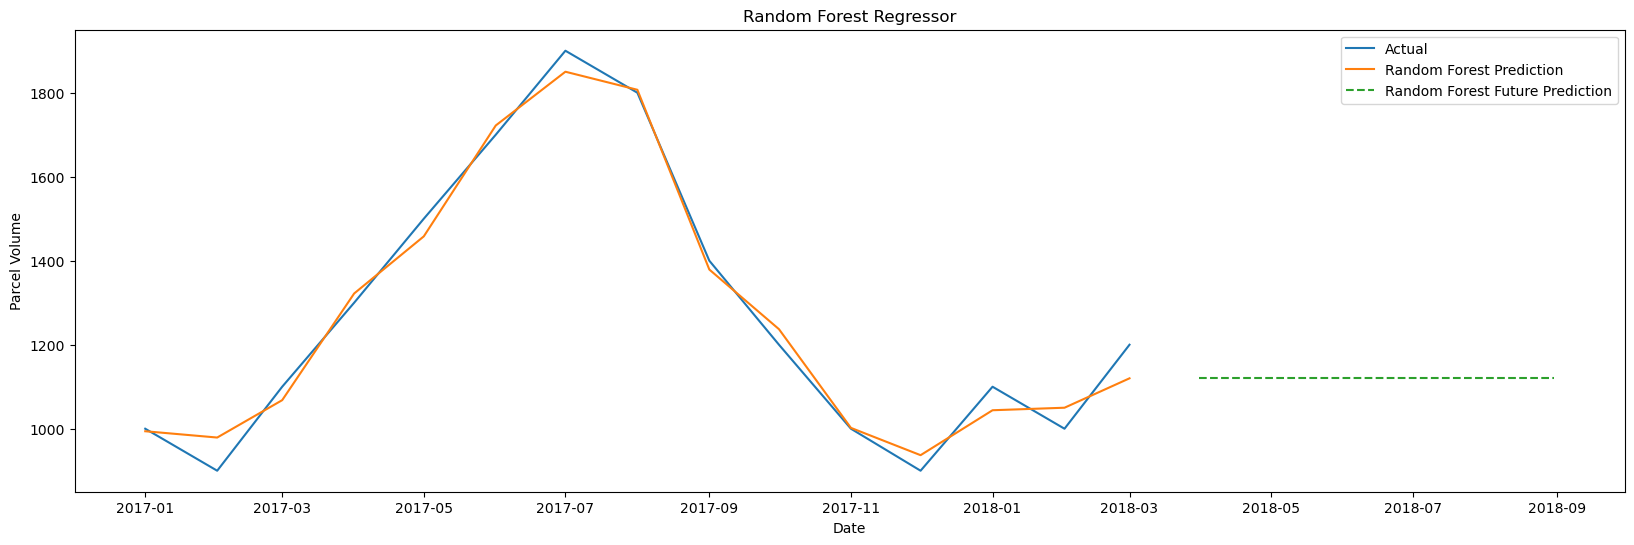

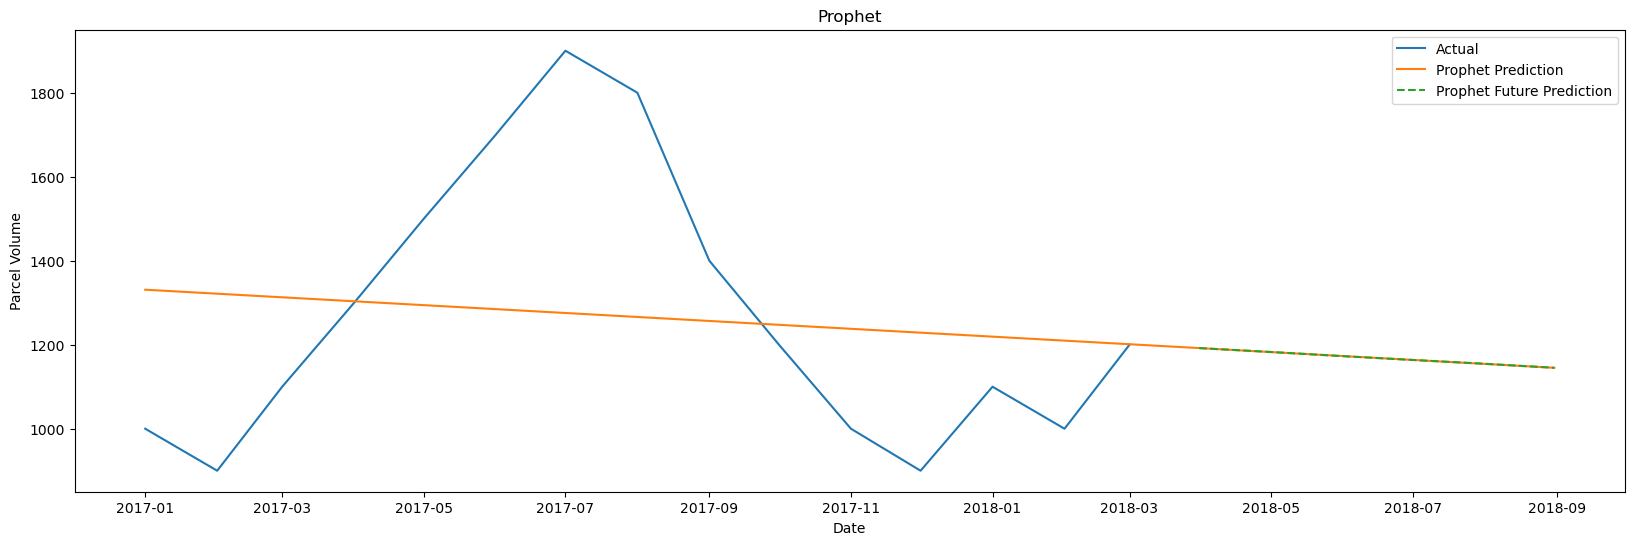

Linear Regression Future Predictions:
[1191.06408145 1181.6841081  1171.99146897 1162.61149561 1152.91885648
 1143.22621735]

ARIMA Future Predictions:
2018-04-01    1501.644381
2018-05-01    1693.728553
2018-06-01    1778.635128
2018-07-01    1731.745135
2018-08-01    1568.111945
2018-09-01    1337.648746
Freq: MS, Name: predicted_mean, dtype: float64

Random Forest Regressor Future Predictions:
[1120. 1120. 1120. 1120. 1120. 1120.]

Prophet Future Predictions:
15    1192.0
16    1183.0
17    1173.0
18    1164.0
19    1155.0
20    1145.0
Name: yhat, dtype: float64


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from statsmodels.tsa.arima.model import ARIMA
from prophet import Prophet
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Load dataset
data = pd.read_csv('malaysia.csv')
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# Linear Regression
X_lr = data.index.to_series().apply(lambda x: x.toordinal()).values.reshape(-1, 1)
y_lr = data['Parcel Volume'].values
regression_lr = LinearRegression()
regression_lr.fit(X_lr, y_lr)

# Predict for all dates in the dataset
y_lr_pred = regression_lr.predict(X_lr)

# Predict for the next 6 months
future_dates_lr = pd.date_range(data.index[-1] + pd.offsets.MonthEnd(1), periods=6, freq='M')
future_dates_ordinal = future_dates_lr.to_series().apply(lambda x: x.toordinal()).values.reshape(-1, 1)
y_lr_future_pred = regression_lr.predict(future_dates_ordinal)

# ARIMA
model_arima = ARIMA(data['Parcel Volume'], order=(2, 0, 2))
model_fit = model_arima.fit()

# Predict for the next 6 months
predictions_arima = model_fit.predict(start='2017-01-01', end='2018-09-01')
predictions_arima_future = model_fit.forecast(steps=6)

# Random Forest Regressor
X_rf = data.index.astype('int64').values.reshape(-1, 1)
y_rf = data['Parcel Volume'].values
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_rf, y_rf)

# Predict for the next 6 months
future_dates_rf = pd.date_range(data.index[-1] + pd.offsets.MonthEnd(1), periods=6, freq='M')
future_dates_rf_ordinal = future_dates_rf.to_series().astype('int64').values.reshape(-1, 1)
y_rf_future_pred = rf_model.predict(future_dates_rf_ordinal)

# Prophet
data_prophet = data.reset_index().rename(columns={'Date': 'ds', 'Parcel Volume': 'y'})
model_prophet = Prophet()
model_prophet.fit(data_prophet)

# Make future dataframe for 6 months
future_dates_prophet = model_prophet.make_future_dataframe(periods=6, freq='M')
forecast_prophet = model_prophet.predict(future_dates_prophet)
predictions_prophet = forecast_prophet[['ds', 'yhat']].tail(6).round(0)

# Plotting results

# Linear Regression Plot
plt.figure(figsize=(20, 6))
plt.plot(data.index, data['Parcel Volume'], label='Actual')
plt.plot(data.index, y_lr_pred, label='Linear Regression Prediction')
plt.plot(future_dates_lr, y_lr_future_pred, label='Linear Regression Future Prediction', linestyle='--')
plt.title('Linear Regression')
plt.xlabel('Date')
plt.ylabel('Parcel Volume')
plt.legend()
plt.show()

# ARIMA Plot
plt.figure(figsize=(20, 6))
plt.plot(data['Parcel Volume'], label='Actual')
plt.plot(predictions_arima.index, predictions_arima, label='ARIMA Prediction')
plt.plot(pd.date_range(data.index[-1] + pd.Timedelta(days=1), periods=6, freq='M'), predictions_arima_future, label='ARIMA Future Prediction', linestyle='--')
plt.title('ARIMA')
plt.xlabel('Date')
plt.ylabel('Parcel Volume')
plt.legend()
plt.show()

# Random Forest Regressor Plot
plt.figure(figsize=(20, 6))
plt.plot(data.index, data['Parcel Volume'], label='Actual')
plt.plot(data.index, rf_model.predict(X_rf), label='Random Forest Prediction')
plt.plot(future_dates_rf, y_rf_future_pred, label='Random Forest Future Prediction', linestyle='--')
plt.title('Random Forest Regressor')
plt.xlabel('Date')
plt.ylabel('Parcel Volume')
plt.legend()
plt.show()

# Prophet Plot
plt.figure(figsize=(20, 6))
plt.plot(data_prophet['ds'], data_prophet['y'], label='Actual')
plt.plot(forecast_prophet['ds'], forecast_prophet['yhat'], label='Prophet Prediction')
plt.plot(predictions_prophet['ds'], predictions_prophet['yhat'], label='Prophet Future Prediction', linestyle='--')
plt.title('Prophet')
plt.xlabel('Date')
plt.ylabel('Parcel Volume')
plt.legend()
plt.show()

# Print the predictions for the next 6 months for each model
print("Linear Regression Future Predictions:")
print(y_lr_future_pred)

print("\nARIMA Future Predictions:")
print(predictions_arima_future)

print("\nRandom Forest Regressor Future Predictions:")
print(y_rf_future_pred)

print("\nProphet Future Predictions:")
print(predictions_prophet['yhat'])
